In [1]:
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#generate some random data points 
np.random.seed(0)
data = np.random.rand(100,2)

In [4]:
#number of clusters
k = 3

#initialize the Kmeans model 
kmeans = KMeans(n_clusters=k)


/home/nimish-grover/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


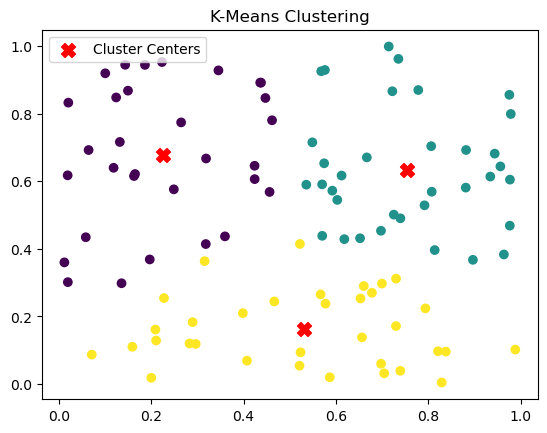

In [6]:
#fit the model to the data 
kmeans.fit(data)

#get the clusters centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

#plot the data points and cluster center 
plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',marker='X',s=100,label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

K-Means on text data

In [7]:
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/nimish-
[nltk_data]     grover/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nimish-
[nltk_data]     grover/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/nimish-grover/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


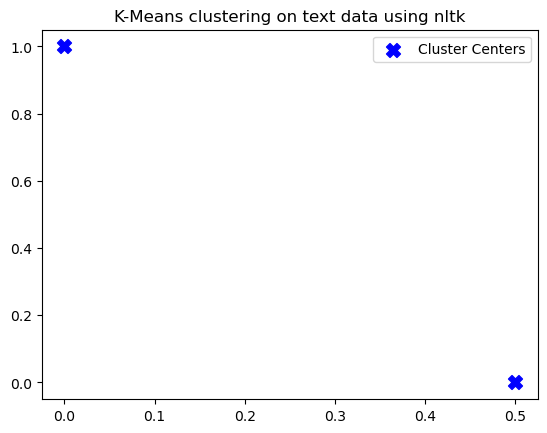

In [12]:
#download the stopwords and punkt tokenizer data from nltk 
#Kmeans clustering on text data
#numpy changes the tokenized words into the clusters
#clusters are initialized using Kmeans and plotted on the graph 
nltk.download('stopwords')
nltk.download('punkt')

#sample text data 
text_data=[
    "Natural language processing is a subfield of artificial intelligence."
    "Text mining involves extracting meaningful information from unstructured text data."
    "Hachine learning algorithms can be applied to analyze text data.",
    "NLP tasks include sentiment analysis, named entity recognition, and language translation.",
    "K-means clustering is a popular unsupervised machine learning algorithm."
]

#pre process the text data

def preprocess_text(text_data):
    stop_words=set(stopwords.words('english'))
    preprocessed_data=[]
    for text in text_data:
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        preprocessed_data.append(filtered_words)
    return preprocessed_data

preprocessed_data=preprocess_text(text_data)

#convert the preprocessed data to numerical vectors using one-hot encoding 

unique_words = sorted(set(word for sublist in preprocessed_data for word in sublist))
one_hot_vectors = np.zeros((len(preprocessed_data),len(unique_words)))
for i,words in enumerate(preprocessed_data):
    for word in words:
        one_hot_vectors[i,unique_words.index(word)] = 1

#number of clusters 
k=2
#initialize the kmeans model
kmeans=KMeans(n_clusters=k)

#data initialization--> Model Fiting-->data labeling-->data plotting --> data visualisation
kmeans.fit(one_hot_vectors)

#get the cluster centers and labels 
centers = kmeans.cluster_centers_
labels = kmeans.labels_

#plot th cluster centers
plt.scatter(centers[:,0],centers[:,1],c='blue',marker='X',s=100,label = 'Cluster Centers')
plt.title("K-Means clustering on text data using nltk")
plt.legend()
plt.show()

